In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import matplotlib.ticker as mtick


In [117]:
df = pd.read_csv('../data/donations.csv', encoding='ISO-8859-1')

In [118]:
print(df.head())

       full_name                                      donation_name  amount  \
0     John Aalto  Aalto (John and Sara) Household $60 Donation 2...    60.0   
1     John Aalto  Aalto (John and Sara) Household $40 Donation 2...    40.0   
2     John Aalto  Aalto (John and Sara) Household $33 Donation 2...    33.0   
3  Sara B. Aalto  Aalto (John and Sara) Household $60 Donation 2...    60.0   
4  Sara B. Aalto  Aalto (John and Sara) Household $40 Donation 2...    40.0   

        type      date          state  \
0  Household  10/31/23  Massachusetts   
1  Household   4/19/23  Massachusetts   
2  Household   5/18/22  Massachusetts   
3  Household  10/31/23  Massachusetts   
4  Household   4/19/23  Massachusetts   

                                            campaign record_type  \
0  1_Direct Mail - News2-Ask-H2309ABSB-H:13-24 m....    Donation   
1  1_Direct Mail - H2211AASB - 22YE1 TH Match - 2...    Donation   
2  1_Direct Mail - A2204MA24-Hanks Acq Multis-Sen...    Donation   
3  1_D

In [119]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27403 entries, 0 to 27402
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   full_name      27403 non-null  object 
 1   donation_name  27403 non-null  object 
 2   amount         27378 non-null  float64
 3   type           21872 non-null  object 
 4   date           27403 non-null  object 
 5   state          26457 non-null  object 
 6   campaign       23184 non-null  object 
 7   record_type    27403 non-null  object 
 8   account        27403 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.9+ MB
None


In [120]:
print(df.describe(include='all'))

                full_name                                  donation_name  \
count               27403                                          27403   
unique              12044                                          19015   
top     Anonymous Records  Elizabeth Dole Foundation | 2022-10-19 Classy   
freq                  161                                             88   
mean                  NaN                                            NaN   
std                   NaN                                            NaN   
min                   NaN                                            NaN   
25%                   NaN                                            NaN   
50%                   NaN                                            NaN   
75%                   NaN                                            NaN   
max                   NaN                                            NaN   

                amount       type      date       state       campaign  \
count     273

In [121]:
df.isnull().sum()

full_name           0
donation_name       0
amount             25
type             5531
date                0
state             946
campaign         4219
record_type         0
account             0
dtype: int64

In [122]:
df = df.dropna()

In [123]:
df.isnull().sum()

full_name        0
donation_name    0
amount           0
type             0
date             0
state            0
campaign         0
record_type      0
account          0
dtype: int64

In [124]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17058 entries, 0 to 27401
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   full_name      17058 non-null  object 
 1   donation_name  17058 non-null  object 
 2   amount         17058 non-null  float64
 3   type           17058 non-null  object 
 4   date           17058 non-null  object 
 5   state          17058 non-null  object 
 6   campaign       17058 non-null  object 
 7   record_type    17058 non-null  object 
 8   account        17058 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB
None


In [125]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

/var/folders/d2/j2y2ckl566g9jz0h9pltn2kc0000gp/T/ipykernel_78445/2370506791.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [126]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17058 entries, 0 to 27401
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   full_name      17058 non-null  object        
 1   donation_name  17058 non-null  object        
 2   amount         17058 non-null  float64       
 3   type           17058 non-null  object        
 4   date           17058 non-null  datetime64[ns]
 5   state          17058 non-null  object        
 6   campaign       17058 non-null  object        
 7   record_type    17058 non-null  object        
 8   account        17058 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 1.3+ MB
None


In [127]:
df.describe()

,amount,date
count,17058.000000,17058
mean,400.362784,2023-04-16 07:01:14.709813760
min,0.010000,2017-01-11 00:00:00
25%,21.600000,2022-06-01 00:00:00
50%,27.810000,2023-07-02 00:00:00
75%,100.000000,2024-05-13 00:00:00
max,1000000.000000,2025-03-25 00:00:00
std,8358.120273,NaN


In [128]:
# Create a new column for display purposes
df['amount_display'] = df['amount'].apply(lambda x: f"${x:,.2f}")

In [129]:
df[['amount', 'amount_display']].head()

,amount,amount_display
0,60.0,$60.00
1,40.0,$40.00
2,33.0,$33.00
3,60.0,$60.00
4,40.0,$40.00


In [130]:
# Bin edges (upper bound is exclusive except last bin)
bin_edges = [0, 25, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000, float('inf')]

# Labels for the bins
bin_labels = [
    '$0–24', '$25–49', '$50–99', '$100–249', '$250–499',
    '$500–999', '$1000–2499', '$2500–4999', '$5000–9999',
    '$10000–24999', '$25000–49999', '$50000–99999', '$100000+'
]

# Create the binned column
df['amount_bin'] = pd.cut(df['amount'], bins=bin_edges, labels=bin_labels, right=False)

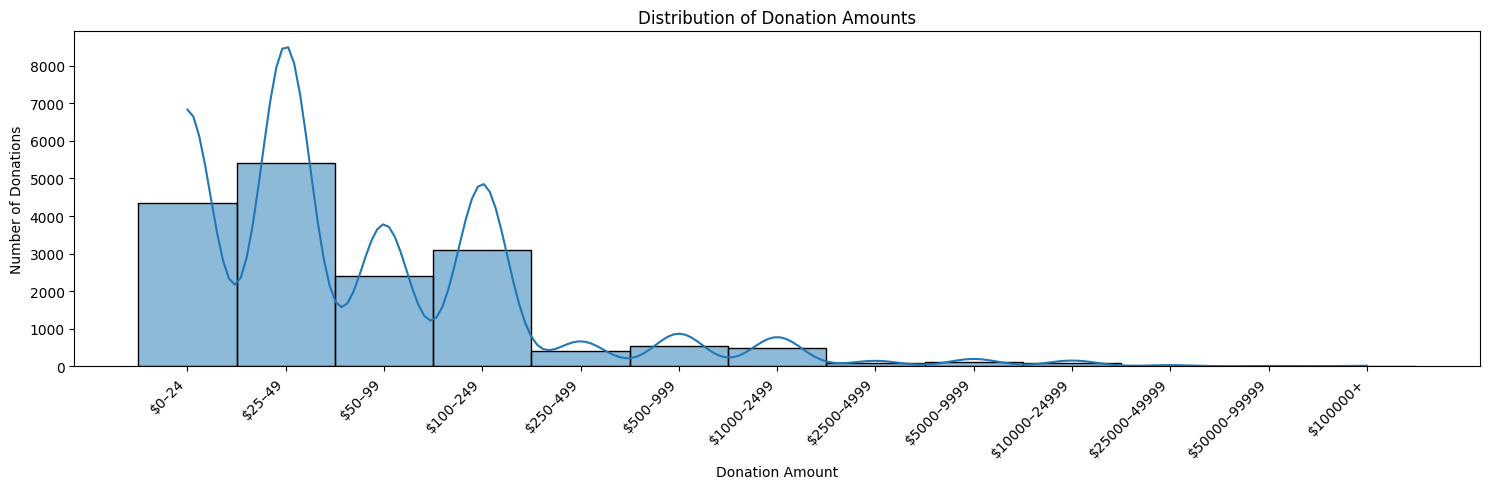

In [131]:
plt.figure(figsize=(15,5))
sns.histplot(df['amount_bin'], bins=30, kde=True)
plt.title('Distribution of Donation Amounts')
plt.xlabel('Donation Amount')
plt.ylabel('Number of Donations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


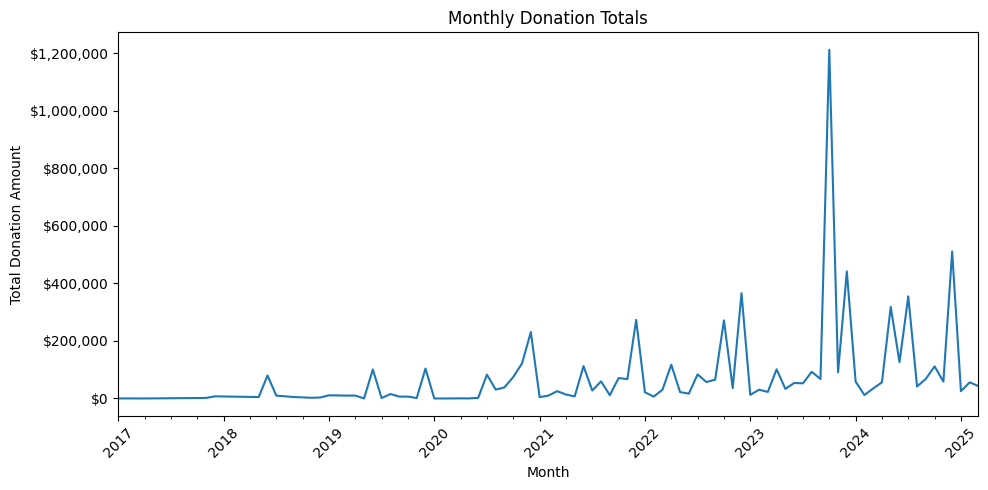

In [132]:
ax = monthly_donations.plot(kind='line', figsize=(10,5), title='Monthly Donation Totals')
ax.set_ylabel('Total Donation Amount')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [133]:
#Feature Eningeering based on Account
donor_features = df.groupby('account').agg(
    donation_count=('amount', 'count'),
    total_donated=('amount', 'sum'),
    average_donation=('amount', 'mean'),
    first_donation_date=('date', 'min'),
    last_donation_date=('date', 'max')
).reset_index()

In [134]:
#Add time based feature
from datetime import datetime
today = datetime.today()

donor_features['days_since_last_donation'] = (
    today - donor_features['last_donation_date']
).dt.days

In [135]:
#add column - donationed again?
donor_features['donated_again'] = donor_features['donation_count'].apply(lambda x: 1 if x > 1 else 0)

In [136]:
donor_features.head()

,account,donation_count,total_donated,average_donation,first_donation_date,last_donation_date,days_since_last_donation,donated_again
0,A Emrich-Petrillo (nancy) Household,1,27.73,27.730000,2024-06-30,2024-06-30,269,0
1,ABROMOWICZ (RICH) Household,1,10.30,10.300000,2021-03-27,2021-03-27,1460,0
2,ANDERSON (NORMAN) Household,1,25.00,25.000000,2022-09-18,2022-09-18,920,0
3,Aalto (John and Sara) Household,6,266.00,44.333333,2022-05-18,2023-10-31,512,1
4,Aamold (Larry) Household,1,10.00,10.000000,2023-12-01,2023-12-01,481,0


In [137]:
#Model training 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
# Features and target
X = donor_features[['donation_count', 'total_donated', 'average_donation', 'days_since_last_donation']]
y = donor_features['donated_again']

In [139]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [141]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[903   0]
 [  0 481]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       903
           1       1.00      1.00      1.00       481

    accuracy                           1.00      1384
   macro avg       1.00      1.00      1.00      1384
weighted avg       1.00      1.00      1.00      1384



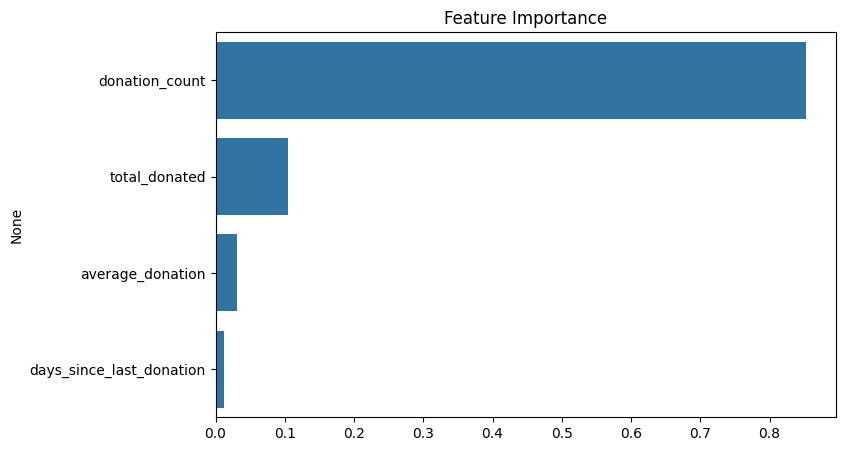

In [142]:
#Feature importance 
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()

In [143]:
#logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [144]:
y_pred_log = logreg.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Confusion Matrix:
[[903   0]
 [  0 481]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       903
           1       1.00      1.00      1.00       481

    accuracy                           1.00      1384
   macro avg       1.00      1.00      1.00      1384
weighted avg       1.00      1.00      1.00      1384



In [145]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})

coef_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
0,donation_count,2.804294
1,total_donated,1.715088
3,days_since_last_donation,-0.000178
2,average_donation,-2.201377


In [146]:
# Example donor info
new_donor = {
    'donation_count': 3,
    'total_donated': 150,
    'average_donation': 50,
    'days_since_last_donation': 120
}

In [147]:
# Turn the dictionary into a DataFrame
input_df = pd.DataFrame([new_donor])

In [148]:
# Make the prediction
prediction = logreg.predict(input_df)[0]
probability = logreg.predict_proba(input_df)[0][1]

In [149]:
if prediction == 1:
    print(f"✅ This household is LIKELY to donate again. (Confidence: {probability:.2%})")
else:
    print(f"❌ This household is UNLIKELY to donate again. (Confidence: {1 - probability:.2%})")

✅ This household is LIKELY to donate again. (Confidence: 100.00%)


In [150]:
def predict_donor_repeat(model, donation_count, total_donated, avg_donation, days_since_last):
    input_data = pd.DataFrame([{
        'donation_count': donation_count,
        'total_donated': total_donated,
        'average_donation': avg_donation,
        'days_since_last_donation': days_since_last
    }])
    
    pred = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1]
    
    if pred == 1:
        return f"✅ Likely to donate again. (Confidence: {prob:.2%})"
    else:
        return f"❌ Unlikely to donate again. (Confidence: {1 - prob:.2%})"

In [151]:
predict_donor_repeat(logreg, 4, 200, 50, 45)

'✅ Likely to donate again. (Confidence: 100.00%)'

In [152]:
predict_donor_repeat(logreg, 1, 50, 50, 145)

'❌ Unlikely to donate again. (Confidence: 100.00%)'